# [Python] Polynomial Regression and Cross Validation

## 01. Linear Regression

Load the data and split it into training and test data set without shuffling.
Build the linear regression model by scikit

Intercept:  -2.82765048766
Coefficients:  [ 0.83606916]
Mean squared error: 2.24
Variance score: 0.55


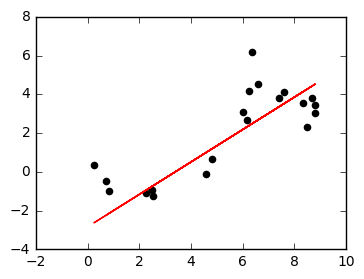

In [13]:
import numpy as np
import mltools as ml
from sklearn import linear_model#import scikit-learn package
import matplotlib.pyplot as plt

data= np.genfromtxt("curve80.txt",delimiter=None) # load the text file

X = data[:,0]
X = X[:,np.newaxis] #make sure it's 2-dimentional
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(Xtr, Ytr)

# The coefficients
print('Intercept: ', lm.intercept_)
print('Coefficients: ', lm.coef_)


# The mean squared error
print("Mean squared error: %.2f" % np.mean((lm.predict(Xte) - Yte) ** 2))
# Explained variance score (R squared): 1 is perfect prediction
print('Variance score: %.2f' % lm.score(Xte, Yte))

# Plot outputs
plt.scatter(Xte, Yte,  color='black')
plt.plot(Xte, lm.predict(Xte), color='red',linewidth=1)

plt.show()

Training data by linear regression model

In [2]:
lr = ml.linear.linearRegress(Xtr, Ytr); # create and train model
xs = np.linspace(0,10,200); # densely sample possible x-values, 200 samples from 0-10
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code), dim(1) to dim(2)
ys = lr.predict(xs); # make predictions at xs

Plot the training data along with predtion function. Print the linear regression coefficients. Calculate and report the mean squared error on both training and test data.

Coef: [[-2.82765049  0.83606916]]


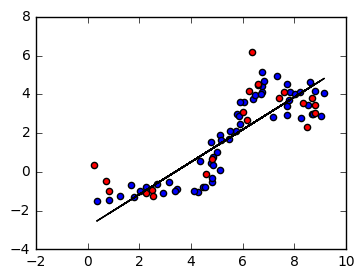

MSE of training data: 1.13
MSE of test data: 2.24


In [3]:
print('Coef:', lr.theta)
plt.rcParams['figure.figsize'] = (4.0, 3.0) #adjust the plot size
plt.scatter(Xtr, Ytr, c='blue')
plt.scatter(Xte, Yte, c='red')
plt.plot(Xtr, lr.predict(Xtr), color='black',linewidth=1)
plt.show()
Ytrhat = []
Ytehat = []

for i in range(Xtr.shape[0]):
    Ytrhat.append(lr.predict(Xtr)[i,0])
Ytrhat = np.array(Ytrhat)

for i in range(Xte.shape[0]):
    Ytehat.append(lr.predict(Xte)[i,0])
Ytehat = np.array(Ytehat)

MSETr = round(sum((Ytr-Ytrhat)**2/Ytr.shape[0]),2)
MSETe = round(sum((Yte-Ytehat)**2/Yte.shape[0]),2)

print('MSE of training data:', MSETr)
print('MSE of test data:', MSETe)

Try fitting model using a polynomial function of increasing order. Adding additional polynomial features before construcing and training the linear regression object.

Coef: [[-2.98759366  0.91346645 -0.00753603]]


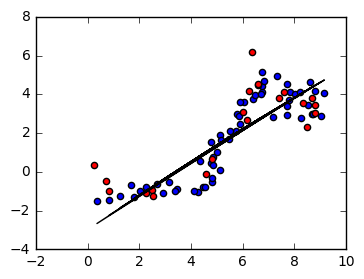

In [4]:
Xtr2 = np.zeros((Xtr.shape[0],2)) # create Mx2 array to store features 
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "x^2" feature as X2

lr2 = ml.linear.linearRegress(Xtr2, Ytr); # create and train model
print('Coef:', lr2.theta)

plt.rcParams['figure.figsize'] = (4.0, 3.0) #adjust the plot size
plt.scatter(Xtr, Ytr, c='blue')
plt.scatter(Xte, Yte, c='red')
plt.plot(Xtr, lr2.predict(Xtr2), color='black',linewidth=1)
plt.show()

A function "ml.transforms.fpoly" is also provided to more easily create functions. The resulting features may include extremely large values so it's should be rescaled.
Train models of degree d=1,3,5,7,10,18
(1) Plot their learned prediction function
(2) Plot their training and test errors on a log scale. (e.g. semilogy)

Y= 1.85 +1.86 X 1
MSE of training data: 1.13
MSE of test data: 2.24

Y= 1.85 +-6.07 X 1 +20.25 X 2 +-12.73 X 3
MSE of training data: 0.63
MSE of test data: 0.86

Y= 1.85 +17.36 X 1 +-125.4 X 2 +314.81 X 3 +-313.61 X 4 +108.42 X 5
MSE of training data: 0.4
MSE of test data: 1.03

Y= 1.85 +-22.87 X 1 +304.03 X 2 +-1494.06 X 3 +3518.45 X 4 +-4226.62 X 5 +2501.96 X 6 +-579.3 X 7
MSE of training data: 0.32
MSE of test data: 0.65

Y= 1.85 +-31.3 X 1 +668.76 X 2 +-6237.91 X 3 +32916.55 X 4 +-106691.01 X 5 +218538.11 X 6 +-282376.22 X 7 +222599.63 X 8 +-97655.44 X 9 +18270.41 X 10
MSE of training data: 0.3
MSE of test data: 0.61

Y= 1.85 +21526.38 X 1 +-767115.04 X 2 +13641941.49 X 3 +-151915415.89 X 4 +1163482767.61 X 5 +-6457708118.07 X 6 +26832411795.6 X 7 +-85210255069.9 X 8 +209444214072.0 X 9 +-401025076784.0 X 10 +598661891227.0 X 11 +-693472729979.0 X 12 +616265739850.0 X 13 +-411695049607.0 X 14 +199828949654.0 X 15 +-66455333968.0 X 16 +13528484269.2 X 17 +-1270001032.87 X 18
MSE of 

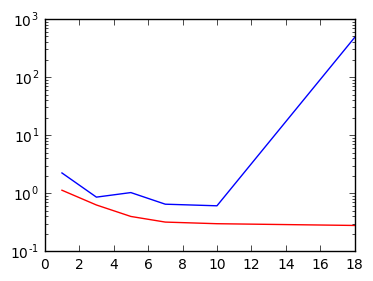

In [55]:
D=[1,3,5,7,10,18]
MSETrls = []
MSETels = []

for d in D:
    # the linear regression learner will add the constant feature automatically
    XtrP = ml.transforms.fpoly(Xtr, d, bias=False);  # creat from 1 to d degree polynomial features

    # Rescasle the data matrix so that the features have similar ranges / variance (Normalization)
    XtrP,params = ml.transforms.rescale(XtrP); # "params" returns the transformation parameters (shift & scale) 

    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress(XtrP, Ytr); # create and train model

    # Define a function "Phi(X)" which outputs the expanded and scaled feature matrix:
    Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, d, False), params)[0]
    
    # the parameters "degree" and "params" are memorized at the function definition
    # Now, Phi will do the required feature expansion and rescaling: 
    YhatTrain = lr.predict(Phi(Xtr)); # predict on training data 
    YhatTest = lr.predict(Phi(Xte)); # predict on test data
   
    #print the prediction function
    print('Y=', round(lr.theta[0][0],2),'+', end='')
    for i in range(1,lr.theta.shape[1]-1):
        print(round(lr.theta[0][i],2), 'X', i, '+',end='')
    print(round(lr.theta[0][lr.theta.shape[1]-1],2), 'X', lr.theta.shape[1]-1)
    
    #Count the training and test errors

    Ytrhat = []
    Ytehat = []
    for i in range(Xtr.shape[0]):
        Ytrhat.append(YhatTrain[i,0])
    Ytrhat = np.array(Ytrhat)

    for i in range(Xte.shape[0]):
        Ytehat.append(YhatTest[i,0])
    Ytehat = np.array(Ytehat)

    MSETr = round(sum((Ytr-Ytrhat)**2/Ytr.shape[0]),2)
    MSETe = round(sum((Yte-Ytehat)**2/Yte.shape[0]),2)
    
    MSETrls.append(MSETr)
    MSETels.append(MSETe)
    
    print('MSE of training data:', MSETr)
    print('MSE of test data:', MSETe)    
    print()   

#Plot the training and test errors on a log scale
plt.semilogy(D, MSETrls, c='red')
plt.semilogy(D, MSETels, c='blue')
plt.show()
    
    
    
    
    #plt.plot( ... ); # A plot whose scale I like, such as a plot of the data points alone 
    #ax = plt.axis(); # get the axes of the plot: [xmin, xmax, ymin, ymax]
    #plt.plot( ... ); # Something else that may be on a very different scale
    #plt.axis(ax); # restore the axis ranges of the 1st plot


## 02. Cross Validation

Creating training/validatation splits, called fold, and using all of these splits to access the out-of-sample(validation) performance by averaginf them.

In [27]:
def countMSE (Yhat2, Y):  #input Yhat(2 dim array)
    #convert 2 dim array to 1 dim
    Yhat = []
    for i in range(Y.shape[0]):    
        Yhat.append(Yhat2[i,0])
    Yhat = np.array(Yhat)
    return round(sum((Y-Yhat)**2/Y.shape[0]),2)
    
J = []
nFolds = 5;
for iFold in range(nFolds):
    Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold); # take ith data block as validation
    learner = ml.linear.linearRegress(Xti, Yti) # TODO: train on Xti, Yti , the data for this fold
    J.append(countMSE(learner.predict(Xvi), Yvi)) # TODO: now compute the MSE on Xvi, Yvi and save it


# the overall estimated validation performance is the average of the performance on each fold
print(np.mean(J))


1.212


Find the MSE of each cross validation foldand plot the error, decide the best degree which minimum cross validation error.

MSE for each degree:  [1.212, 0.74199999999999999, 0.59000000000000008, 0.73199999999999998, 0.76800000000000002, 225010.26799999998]


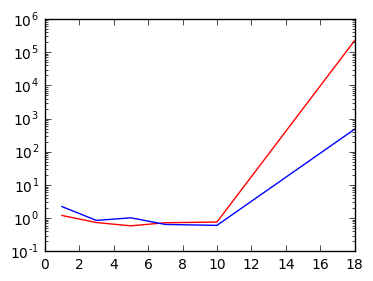

In [54]:
D=[1,3,5,7,10,18]
MSEVals = []

def countMSE (Yhat2, Y):  #input Yhat(2 dim array)
    #convert 2 dim array to 1 dim
    Yhat = []
    for i in range(Y.shape[0]):    
        Yhat.append(Yhat2[i,0])
    Yhat = np.array(Yhat)
    return round(sum((Y-Yhat)**2/Y.shape[0]),2)


for d in D:
    XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP);
    
    J = []
    nFolds = 5;
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold); # take ith data block as validation     
        learner = ml.linear.linearRegress(Xti, Yti) # TODO: train on Xti, Yti , the data for this fold
        J.append(countMSE(learner.predict(Xvi), Yvi)) # TODO: now compute the MSE on Xvi, Yvi and save it       
    MSEVals.append(np.mean(J))
    
print('MSE for each degree: ', MSEls)

#Plot the training and test errors on a log scale
plt.semilogy(D, MSEVals, c='red')
plt.semilogy(D, MSETels, c='blue')
plt.show()
   

The red line show the MSE on different degree of validation data; (5 folds cross-validation)  
The blue line show the MSE on different degree of test data;  

The best degree from validation is 5, from test data is 10.  
In this case I probably will choose 10 to be the final recommendation.